In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
data= pd.read_csv('income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
data.shape

(22, 3)

Text(0, 0.5, 'Income')

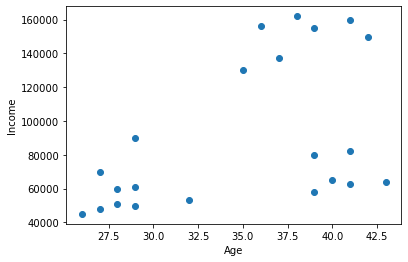

In [4]:
plt.scatter(data['Age'], data['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')

 no validation bcs its unsupervised-- karanm ayn krityayt y values/target illa



In [5]:
sse=[]
for k in range(1, len(data)):
    km= KMeans(n_clusters= k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\palla\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


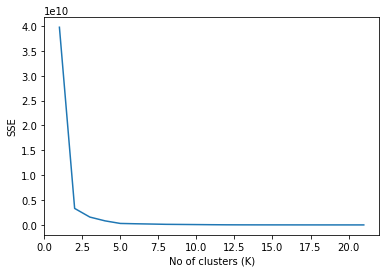

In [6]:
plt.xlabel('No of clusters (K)')
plt.ylabel('SSE')
plt.plot(range(1, len(data)), sse)

In [9]:
scaler = MinMaxScaler()
data['Income($)'] = scaler.fit_transform(data[['Income($)']])
data['Age']= scaler.fit_transform(data[['Age']])

In [10]:
data

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [11]:
km_model = KMeans(n_clusters=3)
prediction = km_model.fit_predict(data[['Age','Income($)']])


In [12]:
km_model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [13]:
data['clusters']= prediction
data

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [14]:
# seperating the clusters
df1= data[data['clusters']==0]
df2= data[data['clusters']==1]
df3= data[data['clusters']==2]

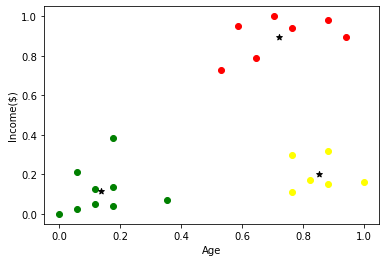

In [15]:
plt.scatter(df1['Age'], df1['Income($)'], color='red')
plt.scatter(df2['Age'], df2['Income($)'], color='green')
plt.scatter(df3['Age'], df3['Income($)'], color='yellow')
plt.xlabel('Age')
plt.ylabel('Income($)')

centers = km_model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='*', color= 'black')